In [2]:
import pandas as pd
import numpy as np
import sys

# 添加config路径
sys.path.append(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages')
import config

# 设置日期范围
start_date = "2015-01-01"  
end_date = "2025-04-15"

import pickle
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_df.pkl', 'rb') as f:
    stock_df = pickle.load(f)


In [3]:
stock_df2=stock_df.copy(deep=True)
stock_df2[[x for x in list(stock_df2.columns) if x[:3] in ['688','300']]]/=2

## Baseline

load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-06-19 极端市场，不调仓
2015-06-29 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-07-06 极端市场，不调仓
2015-07-13 极端市场，不调仓
2015-07-20 极端市场，不调仓
2015-07-27 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-08-10 极端市场，不调仓
long: Series([], Name: 0, dtype: float64)
short: 601069   2.0469
600095   1.0442
600838   0.4515
Name: 0, dtype: float64
mean: 600095   -1.0442
600838   -0.4515
601069   -2.0469
Name: 0, dtype: float64
bt_start_date: 2015-08-25
bt_end_date: 2015-08-31
style_date: 2015-08-21
trade_date: 2015-08-24
cross_df:          0  2015-08-21
000002 nan      0.0462
000025 nan     -0.2893
000059 nan     -0.0730
000068 nan     -0.1452
000155 nan     -0.0840
...     ..         ...
603268 nan      0.1115
603288 nan      0.0919
603600 nan      0.0719
603729 nan      0.1261
603808 nan      0.0000

[440 rows x 2 columns]
tradeSta:          return stockName suspend   quit  ST     sc  return2   list_date  \
000001 -10.0000  平安银行       U  False   1  False        0  

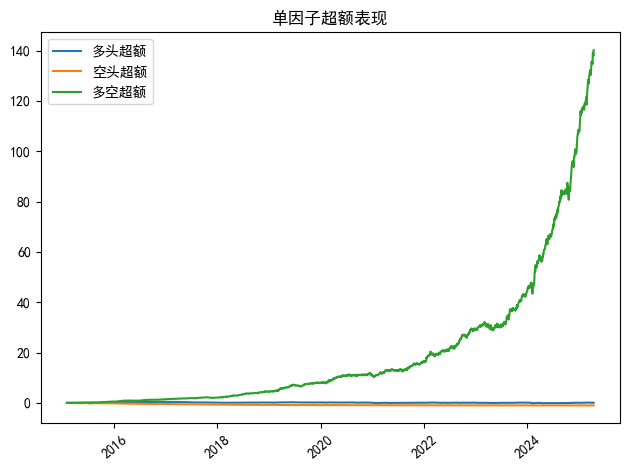

平均单边换手：0.672
年化交易成本:0.198 (未在超额中扣除)


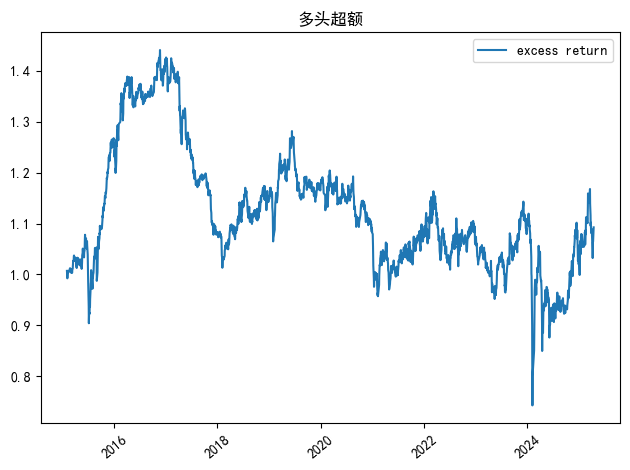

Rank IC: 5.89%
Rank ICIR: 0.41
t值: 9.76
年化收益率: 3.75%
年化波动率: 14.22%
信息比率: 0.26
最大回撤: 39.64%


In [20]:
##计算score
max_win=5*4##判断是否是彩票股的窗口
pret_win=5##给彩票股排强弱的窗口
max_score=stock_df2.rolling(max_win).max().shift(pret_win)
pret_score=stock_df.rolling(pret_win).sum()
##只保留max_score最高20%
max_score2=max_score.apply(lambda x:x>x.quantile(0.8),axis=1)
#print(max_score2)
##在top 20%里按pret_score排序
factor_df_1=-1*(pret_score.mul(max_score2)).dropna(how='all').replace(0,np.nan)
# factor_df[factor_df.apply(lambda x:x>x.quantile(0.9),axis=1)]=np.nan
#print(factor_df)
res_1=config.backtest_stand(factor_df_1.loc['2015':],top=300,fre='week',stock_pool='888888')
# Rank IC
rank_ic = res_1['ic']['ic'].mean()
# Rank ICIR
rank_icir = res_1['ic']['ic'].mean() / res_1['ic']['ic'].std()
# t值
t_value = res_1['ic']['ic'].mean() / (res_1['ic']['ic'].std() / np.sqrt(res_1['ic']['ic'].count()))
perf = res_1['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")

## 4.3 MAX - 13W

In [21]:
##计算score
max_win=5*13##判断是否是彩票股的窗口
pret_win=5##给彩票股排强弱的窗口
max_score=stock_df2.rolling(max_win).max().shift(pret_win)
pret_score=stock_df.rolling(pret_win).sum()

load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-06-19 极端市场，不调仓
2015-06-29 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-07-06 极端市场，不调仓
2015-07-13 极端市场，不调仓
2015-07-20 极端市场，不调仓
2015-07-27 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-08-10 极端市场，不调仓
2015-08-24 极端市场，不调仓
2015-09-01 极端市场，不调仓
2015-09-14 极端市场，不调仓
2016-01-04 极端市场，不调仓
2016-01-11 极端市场，不调仓
2020-02-03 极端市场，不调仓
2025-04-07 极端市场，不调仓
多头超额:
             2015   2016    2017   2018   2019    2020   2021   2022   2023  \
年化超额   0.1096 0.1226 -0.2418 0.0930 0.0553 -0.1844 0.0082 0.0215 0.0842   
波动率     0.1404 0.0931  0.1055 0.1135 0.1094  0.1071 0.1369 0.1474 0.1218   
最大回撤   0.1707 0.0522  0.2837 0.0810 0.1106  0.2111 0.1377 0.1241 0.1118   
夏普率     0.7809 1.3162 -2.2930 0.8189 0.5060 -1.7209 0.0600 0.1462 0.6915   
收益回撤比 0.6422 2.3493 -0.8524 1.1486 0.5004 -0.8737 0.0596 0.1737 0.7531   
半波       0.0859 0.0590  0.0745 0.0671 0.0681  0.0677 0.0807 0.0841 0.0654   
半夏普     1.2758 2.0756 -3.2469 1.3856 0.8131 -2.7238 0.1018 0.2562 1.2874  

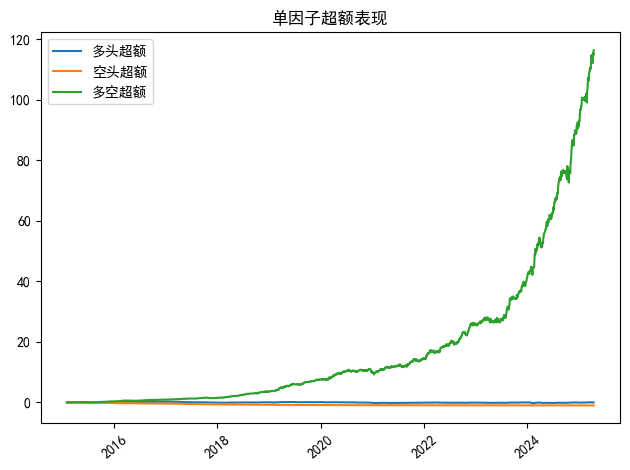

平均单边换手：0.638
年化交易成本:0.182 (未在超额中扣除)


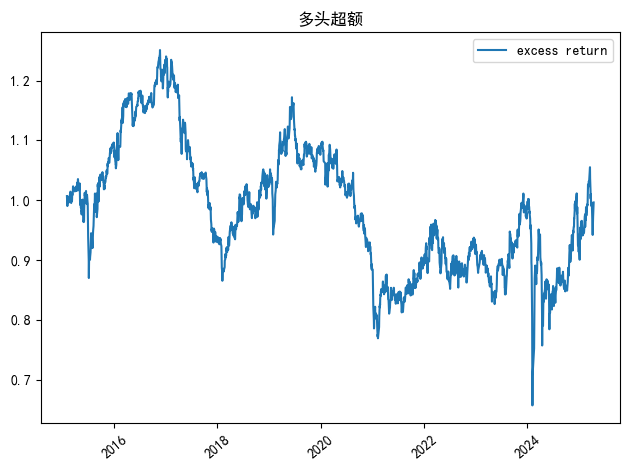

In [22]:
##只保留max_score最高20%
max_score2=max_score.apply(lambda x:x>x.quantile(0.8),axis=1)
#print(max_score2)
##在top 20%里按pret_score排序
factor_df_2=-1*(pret_score.mul(max_score2)).dropna(how='all').replace(0,np.nan)
# factor_df[factor_df.apply(lambda x:x>x.quantile(0.9),axis=1)]=np.nan
#print(factor_df)
res_2=config.backtest_stand(factor_df_2.loc['2015':],top=300,fre='week',stock_pool='888888')

In [56]:
# Rank IC
rank_ic = res_2['ic']['ic'].mean()
# Rank ICIR
rank_icir = res_2['ic']['ic'].mean() / res_2['ic']['ic'].std()
# t值
t_value = res_2['ic']['ic'].mean() / (res_2['ic']['ic'].std() / np.sqrt(res_2['ic']['ic'].count()))
perf = res_2['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")

Rank IC: 5.62%
Rank ICIR: 0.38
t值: 9.04
年化收益率: 3.33%
年化波动率: 14.30%
信息比率: 0.23
最大回撤: 40.76%


## 5.1 Amihud Illiquidity

In [23]:
# 1. 计算Amihud Illiquidity
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_amount.pkl', 'rb') as f:
    stock_amount = pickle.load(f)
abs_return = stock_df.abs() / 100.0
amihud_daily = abs_return / stock_amount
amihud_daily = amihud_daily.replace([np.inf, -np.inf], np.nan)
amihud_daily*1e6

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128,b1,b2,b3,b4,b5,b6
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-05,0.0806,0.0630,24.9319,1.6306,1.9129,13.3600,11.2430,0.7796,7.9307,1.3123,0.2913,0.5597,1.4220,nan,7.7030,4.6234,17.1090,3.6946,1.1351,7.0415,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-06,0.0944,0.0358,9.6905,0.9580,1.0015,6.4373,11.9337,0.4861,7.9289,8.0285,0.1617,0.8593,0.7366,nan,16.2590,3.0824,9.2000,1.7680,0.6309,3.2789,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-07,0.0484,0.0100,9.8951,0.4271,0.1815,4.6731,5.8050,0.1065,6.9957,2.0208,0.0417,0.0000,0.4538,nan,0.0000,1.1780,2.5443,0.1239,0.6968,0.3697,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-08,0.1028,0.0102,5.3299,1.0210,0.4138,4.0712,3.5993,0.6045,3.4666,0.5812,0.0090,2.2673,1.0707,nan,6.6391,0.3226,20.1357,1.2891,2.4800,4.8185,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-09,0.0441,0.0032,7.6944,1.1982,0.2290,0.0000,7.0847,0.5619,2.1047,6.3331,0.3605,1.5937,0.8550,nan,6.0563,2.2234,7.0023,1.2139,0.6964,6.3612,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,0.0016,0.0298,0.4148,nan,0.0953,0.7533,0.0677,0.0678,0.4005,0.7777,0.0809,0.3443,0.2995,0.0769,nan,0.1112,0.4406,0.0454,nan,nan,...,0.6148,0.0285,0.4591,1.3566,0.8267,1.4897,1.2838,0.8939,0.6989,0.8297,0.7745,0.3303,2.6285,1.1480,nan,nan,nan,nan,nan,nan
2025-04-10,0.0098,0.0134,0.4508,nan,0.0957,1.4656,0.0482,0.0782,0.7729,0.4852,0.0910,0.7912,0.3157,0.3044,nan,0.0466,1.4094,0.0120,nan,nan,...,0.2318,0.0094,0.2137,0.5172,0.1887,0.4479,0.2942,0.3830,0.0111,0.4384,0.2548,0.0079,1.0401,0.5032,nan,nan,nan,nan,nan,nan
2025-04-11,0.0014,0.0171,0.0869,nan,0.1105,0.5720,0.0281,0.0514,0.0000,0.4384,0.0000,0.0000,0.1263,0.1887,nan,0.1728,0.4822,0.0328,nan,nan,...,0.0493,0.0602,0.1232,0.2982,0.0929,0.1188,0.0696,0.0848,0.2527,0.0982,0.0046,0.1200,0.3872,0.0542,nan,nan,nan,nan,nan,nan


In [24]:
##计算score
max_win=20##判断是否是彩票股的窗口
pret_win=5##给彩票股排强弱的窗口
illiquidity_win=20##计算流动性得分窗口
illiquidity_score = amihud_daily.rolling(illiquidity_win).mean()
max_score=stock_df2.rolling(max_win).max().shift(pret_win)
pret_score=stock_df.rolling(pret_win).sum()

## 只保留illiquidity得分最高的30%
illiquidity_score2=illiquidity_score.apply(lambda x:x>x.quantile(0.7),axis=1)
##只保留max_score最高20%
max_score2=max_score.apply(lambda x:x>x.quantile(0.8),axis=1)

load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-06-19 极端市场，不调仓
2015-06-29 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-07-06 极端市场，不调仓
2015-07-13 极端市场，不调仓
2015-07-20 极端市场，不调仓
2015-07-27 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-08-10 极端市场，不调仓
long: Series([], Name: 0, dtype: float64)
short: 600838   0.4921
Name: 0, dtype: float64
mean: 600838   -0.4921
Name: 0, dtype: float64
bt_start_date: 2015-08-25
bt_end_date: 2015-08-31
style_date: 2015-08-21
trade_date: 2015-08-24
cross_df:          0  2015-08-21
000002 nan      0.0462
000025 nan     -0.2893
000059 nan     -0.0730
000068 nan     -0.1452
000155 nan     -0.0840
...     ..         ...
603268 nan      0.1115
603288 nan      0.0919
603600 nan      0.0719
603729 nan      0.1261
603808 nan      0.0000

[440 rows x 2 columns]
tradeSta:          return stockName suspend   quit  ST     sc  return2   list_date  \
000001 -10.0000  平安银行       U  False   1  False        0  1991-04-03   
000002  -5.1800     万科A       U  False   1  False   

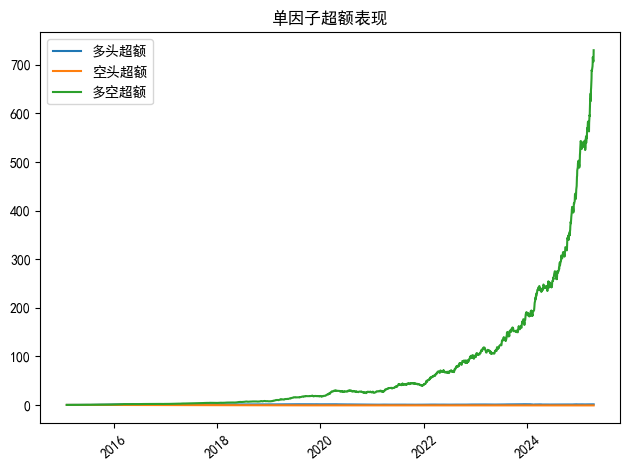

平均单边换手：0.696
年化交易成本:0.211 (未在超额中扣除)


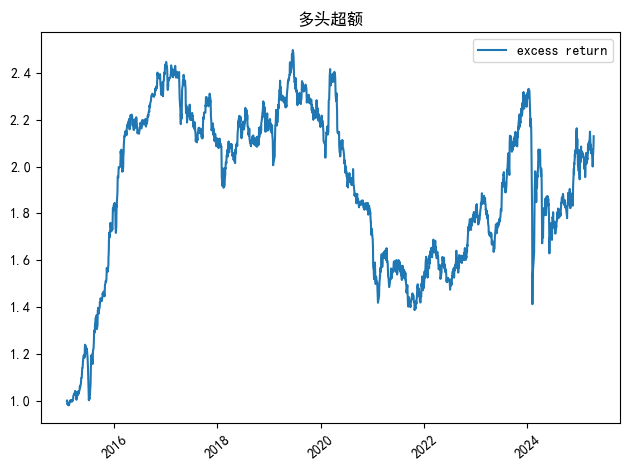

In [25]:
factor_df_3=-1*(pret_score.mul(max_score2).mul(illiquidity_score2)).replace(0,np.nan).dropna(how='all')
# factor_df[factor_df.apply(lambda x:x>x.quantile(0.9),axis=1)]=np.nan
#print(factor_df)
res_3=config.backtest_stand(factor_df_3.loc['2015':],top=300,fre='week',stock_pool='888888')

In [26]:
# Rank IC
rank_ic = res_3['ic']['ic'].mean()
# Rank ICIR
rank_icir = res_3['ic']['ic'].mean() / res_3['ic']['ic'].std()
# t值
t_value = res_3['ic']['ic'].mean() / (res_3['ic']['ic'].std() / np.sqrt(res_3['ic']['ic'].count()))
perf = res_3['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")

Rank IC: 6.40%
Rank ICIR: 0.39
t值: 9.43
年化收益率: 13.52%
年化波动率: 16.92%
信息比率: 0.80
最大回撤: 48.03%


## 5.2 Turnover

In [27]:
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_turnover_f.pkl', 'rb') as f:
    stock_turnover = pickle.load(f)

In [28]:
##计算score
max_win=20##判断是否是彩票股的窗口
pret_win=5##给彩票股排强弱的窗口
turnover_win=20##计算流动性得分窗口
turnover_score = stock_turnover.rolling(turnover_win).mean()
max_score=stock_df2.rolling(max_win).max().shift(pret_win)
pret_score=stock_df.rolling(pret_win).sum()

## 只保留Turnover最高30%
turnover_score2=turnover_score.apply(lambda x:x>x.quantile(0.7),axis=1)
##只保留max_score最高20%
max_score2=max_score.apply(lambda x:x>x.quantile(0.8),axis=1)

load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-06-19 极端市场，不调仓
2015-06-29 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-07-06 极端市场，不调仓
2015-07-13 极端市场，不调仓
2015-07-20 极端市场，不调仓
2015-07-27 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-08-10 极端市场，不调仓
long: Series([], Name: 0, dtype: float64)
short: 601069   1.7726
600095   0.9032
600838   0.3894
Name: 0, dtype: float64
mean: 600095   -0.9032
600838   -0.3894
601069   -1.7726
Name: 0, dtype: float64
bt_start_date: 2015-08-25
bt_end_date: 2015-08-31
style_date: 2015-08-21
trade_date: 2015-08-24
cross_df:          0  2015-08-21
000002 nan      0.0462
000025 nan     -0.2893
000059 nan     -0.0730
000068 nan     -0.1452
000155 nan     -0.0840
...     ..         ...
603268 nan      0.1115
603288 nan      0.0919
603600 nan      0.0719
603729 nan      0.1261
603808 nan      0.0000

[440 rows x 2 columns]
tradeSta:          return stockName suspend   quit  ST     sc  return2   list_date  \
000001 -10.0000  平安银行       U  False   1  False        0  

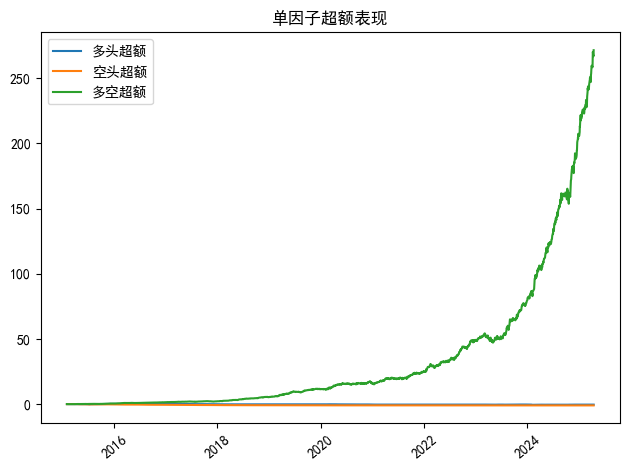

平均单边换手：0.653
年化交易成本:0.189 (未在超额中扣除)


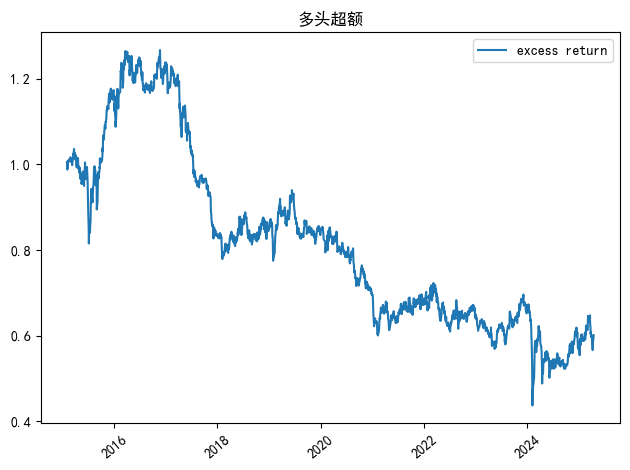

Rank IC: 6.80%
Rank ICIR: 0.44
t值: 10.66
年化收益率: -1.95%
年化波动率: 16.68%
信息比率: -0.12
最大回撤: 41.61%


In [29]:
factor_df_4=-1*(pret_score.mul(max_score2).mul(turnover_score2)).replace(0,np.nan).dropna(how='all')
# factor_df[factor_df.apply(lambda x:x>x.quantile(0.9),axis=1)]=np.nan
#print(factor_df)
res_4=config.backtest_stand(factor_df_4.loc['2015':],top=300,fre='week',stock_pool='888888')
# Rank IC
rank_ic = res_4['ic']['ic'].mean()
# Rank ICIR
rank_icir = res_4['ic']['ic'].mean() / res_4['ic']['ic'].std()
# t值
t_value = res_4['ic']['ic'].mean() / (res_4['ic']['ic'].std() / np.sqrt(res_4['ic']['ic'].count()))
perf = res_4['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")

## 5.3 Size effect

In [30]:
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_totalmv.pkl', 'rb') as f:
    stock_totalmv = pickle.load(f)

In [31]:
##计算score
max_win=20##判断是否是彩票股的窗口
pret_win=5##给彩票股排强弱的窗口
size_win=20##计算流动性得分窗口
size_score = stock_totalmv.rolling(size_win).mean()
max_score=stock_df2.rolling(max_win).max().shift(pret_win)
pret_score=stock_df.rolling(pret_win).sum()

## 只保留size得分最低30%
size_score2=size_score.apply(lambda x:x<x.quantile(0.3),axis=1)
##只保留max_score最高20%
max_score2=max_score.apply(lambda x:x>x.quantile(0.8),axis=1)

load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-06-19 极端市场，不调仓
2015-06-29 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-07-06 极端市场，不调仓
2015-07-13 极端市场，不调仓
2015-07-20 极端市场，不调仓
2015-07-27 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-08-10 极端市场，不调仓
long: Series([], Name: 0, dtype: float64)
short: 600095   1.0607
600838   0.4424
Name: 0, dtype: float64
mean: 600095   -1.0607
600838   -0.4424
Name: 0, dtype: float64
bt_start_date: 2015-08-25
bt_end_date: 2015-08-31
style_date: 2015-08-21
trade_date: 2015-08-24
cross_df:          0  2015-08-21
000002 nan      0.0462
000025 nan     -0.2893
000059 nan     -0.0730
000068 nan     -0.1452
000155 nan     -0.0840
...     ..         ...
603268 nan      0.1115
603288 nan      0.0919
603600 nan      0.0719
603729 nan      0.1261
603808 nan      0.0000

[440 rows x 2 columns]
tradeSta:          return stockName suspend   quit  ST     sc  return2   list_date  \
000001 -10.0000  平安银行       U  False   1  False        0  1991-04-03   
000002  -5.1800    

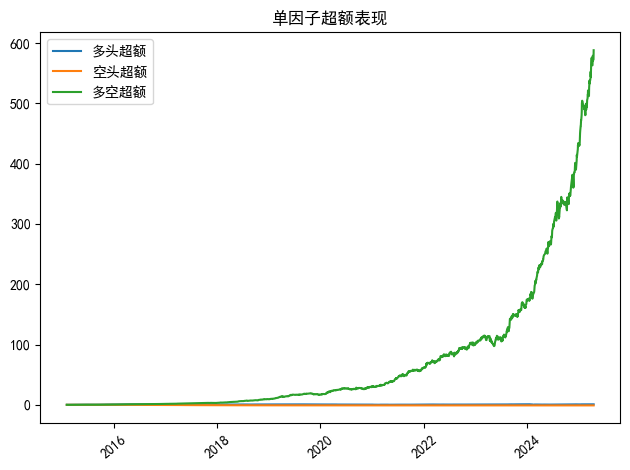

平均单边换手：0.666
年化交易成本:0.195 (未在超额中扣除)


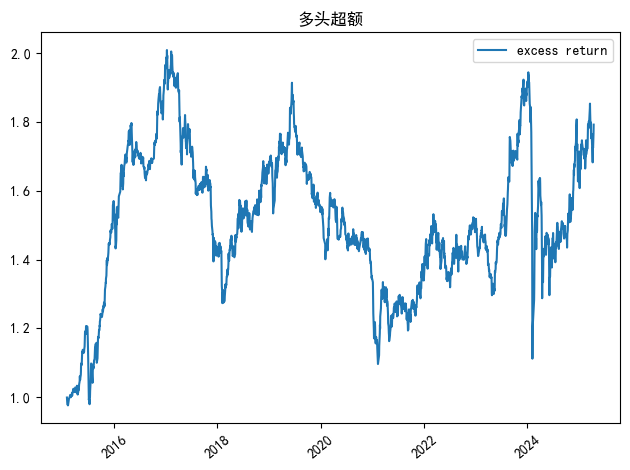

Rank IC: 7.02%
Rank ICIR: 0.45
t值: 10.88
年化收益率: 10.98%
年化波动率: 17.70%
信息比率: 0.62
最大回撤: 53.21%


In [32]:
factor_df_5=-1*(pret_score.mul(max_score2).mul(size_score2)).replace(0,np.nan).dropna(how='all')
# factor_df[factor_df.apply(lambda x:x>x.quantile(0.9),axis=1)]=np.nan
#print(factor_df)
res_5=config.backtest_stand(factor_df_5.loc['2015':],top=300,fre='week',stock_pool='888888')
# Rank IC
rank_ic = res_5['ic']['ic'].mean()
# Rank ICIR
rank_icir = res_5['ic']['ic'].mean() / res_5['ic']['ic'].std()
# t值
t_value = res_5['ic']['ic'].mean() / (res_5['ic']['ic'].std() / np.sqrt(res_5['ic']['ic'].count()))
perf = res_5['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")

## 6.1  CGO

In [33]:
window_days = 252  # 1年，假设每年252个交易日
from tqdm import tqdm
# 1. 计算每一天的参考价格
def calc_reference_price(stock_close, stock_turnover, window=window_days):
    print("计算参考价格R...")
    ref_price = pd.DataFrame(index=stock_close.index, columns=stock_close.columns)
    for i in tqdm(range(window, len(stock_close))):
        # 取过去window天的数据
        close_window = stock_close.iloc[i-window:i]
        turnover_window = stock_turnover.iloc[i-window:i]
        # 计算每一天的权重
        # 换手率权重
        weights = turnover_window / (1 + turnover_window).cumprod()
        # 归一化
        weights = weights.div(weights.sum())
        # 参考价格 = 加权平均
        ref_price.iloc[i] = (close_window * weights).sum()
    return ref_price

# 2. 计算参考价格
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_close.pkl', 'rb') as f:
    stock_close = pickle.load(f)
reference_price = calc_reference_price(stock_close, stock_turnover, window=window_days)
reference_price

计算参考价格R...


100%|██████████| 3702/3702 [07:30<00:00,  8.21it/s]


,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128,b1,b2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,10.4135,9.2928,14.5647,0.0000,3.9242,4.5559,2.6019,10.8265,2.4181,8.2507,5.5077,11.7140,3.5032,9.6451,0.0000,6.6556,15.4200,14.8116,0.0000,4.1674,...,10.1964,67.8995,20.0814,25.5229,35.8886,76.1400,52.8291,52.3783,21.6403,36.3376,42.3337,24.1669,68.2927,19.2803,23.8488,35.2207,23.0891,46.0949,0.0000,0.0000
2025-04-10,10.4810,9.3451,14.6158,0.0000,3.8882,4.4926,2.4478,10.6436,2.3301,8.3079,5.4935,11.8983,3.4169,9.2424,0.0000,6.5580,15.7589,14.2416,0.0000,4.1140,...,9.9533,67.8995,20.0814,25.5229,35.8886,76.1400,52.8291,52.3783,21.6403,36.3376,42.3337,24.1669,68.2927,19.2803,23.8488,35.2207,23.0891,46.0949,0.0000,0.0000
2025-04-11,10.5755,9.3547,14.7944,0.0000,3.9321,4.4553,2.4283,10.6479,2.3305,8.5130,5.4973,12.3083,3.3846,8.8750,0.0000,6.5541,16.5035,14.1068,0.0000,4.0325,...,9.9051,67.8995,20.0814,25.5229,35.8886,76.1400,52.8291,52.3783,21.6403,36.3376,42.3337,24.1669,68.2927,19.2803,23.8488,35.2207,23.0891,46.0949,0.0000,0.0000


In [5]:
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_close.pkl', 'rb') as f:
    stock_close = pickle.load(f)

In [6]:
# 计算CGO
# CGO_{i,t} = (P_{i,t-1} - R_{i,t}) / P_{i,t-1}
def calc_cgo(stock_close, reference_price):
    print("计算CGO...")
    # P_{i,t-1}
    prev_close = stock_close.shift(1)
    # CGO
    cgo = (prev_close - reference_price) / prev_close
    return cgo

cgo = calc_cgo(stock_close, reference_price)
cgo

计算CGO...


,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,873833,920002,920008,920016,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128,b1,b2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,0.0376,-0.3666,-0.6818,NaN,0.3127,0.1516,0.0538,-0.4416,-0.0075,-0.0986,-0.1571,-0.2582,0.0877,-0.7600,NaN,0.0982,-0.5343,0.0714,NaN,NaN,...,0.4002,0.5363,0.4071,-0.1126,-0.9687,0.0827,-1.0072,-0.4940,-0.3342,-0.7012,-0.6370,0.1482,0.1682,0.0563,-0.0050,0.5435,0.0510,-0.6990,1.0000,1.0000
2025-04-10,0.0295,-0.3237,-0.6459,NaN,0.3432,0.1832,0.1530,-0.3986,0.0566,-0.0624,-0.1469,-0.2472,0.1903,-0.6713,NaN,0.0789,-0.5360,0.1395,NaN,NaN,...,0.4599,0.6433,0.5198,-0.0426,-0.8357,0.1040,-0.8661,-0.4061,-0.1930,-0.5737,-0.4249,0.2095,0.2314,0.1156,0.0724,0.6242,0.1251,-0.5840,1.0000,1.0000
2025-04-11,0.0298,-0.2993,-0.6222,NaN,0.3554,0.2345,0.2064,-0.3775,0.0932,-0.0668,-0.1405,-0.1733,0.2706,-0.5598,NaN,0.0947,-0.5267,0.1553,NaN,NaN,...,0.4881,0.6782,0.5219,-0.0064,-0.7864,0.0968,-0.7914,-0.3708,-0.1603,-0.5306,-0.3714,0.2369,0.2327,0.1473,0.1000,0.6260,0.1564,-0.5248,1.0000,1.0000


In [7]:
##计算score
max_win=20##判断是否是彩票股的窗口
pret_win=5##给彩票股排强弱的窗口
cgo_win=20##计算CGO得分窗口
cgo_score = cgo.rolling(cgo_win).mean()
max_score=stock_df2.rolling(max_win).max().shift(pret_win)
pret_score=stock_df.rolling(pret_win).sum()

## 只保留cgo得分最低30%
cgo_score2=cgo_score.apply(lambda x:x>x.quantile(0.6),axis=1)
##只保留max_score最高20%
max_score2=max_score.apply(lambda x:x>x.quantile(0.8),axis=1)

load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-06-19 极端市场，不调仓
2015-06-29 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-07-06 极端市场，不调仓
2015-07-13 极端市场，不调仓
2015-07-20 极端市场，不调仓
2015-07-27 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-08-10 极端市场，不调仓
long: Series([], Name: 0, dtype: float64)
short: 600095   0.8848
Name: 0, dtype: float64
mean: 600095   -0.8848
Name: 0, dtype: float64
bt_start_date: 2015-08-25
bt_end_date: 2015-08-31
style_date: 2015-08-21
trade_date: 2015-08-24
cross_df:          0  2015-08-21
000002 nan      0.0462
000025 nan     -0.2893
000059 nan     -0.0730
000068 nan     -0.1452
000155 nan     -0.0840
...     ..         ...
603268 nan      0.1115
603288 nan      0.0919
603600 nan      0.0719
603729 nan      0.1261
603808 nan      0.0000

[440 rows x 2 columns]
tradeSta:          return stockName suspend   quit  ST     sc  return2   list_date  \
000001 -10.0000  平安银行       U  False   1  False        0  1991-04-03   
000002  -5.1800     万科A       U  False   1  False   

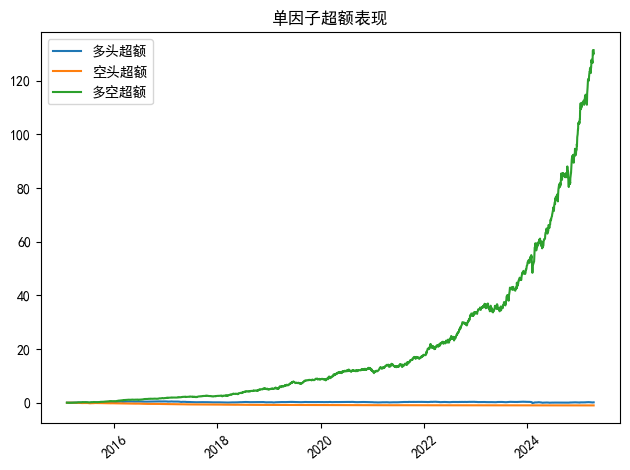

平均单边换手：0.65
年化交易成本:0.188 (未在超额中扣除)


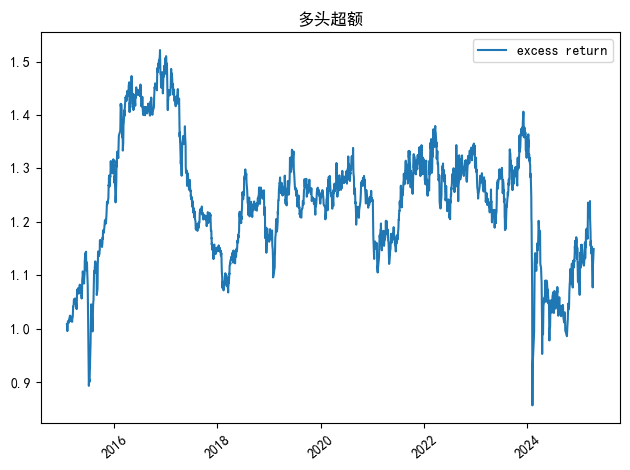

Rank IC: 5.63%
Rank ICIR: 0.38
t值: 9.06
年化收益率: 4.28%
年化波动率: 15.84%
信息比率: 0.27
最大回撤: 44.72%


In [8]:
factor_df_6=-1*(pret_score.mul(max_score2).mul(cgo_score2)).replace(0,np.nan).dropna(how='all')
# factor_df[factor_df.apply(lambda x:x>x.quantile(0.9),axis=1)]=np.nan
#print(factor_df)
res_6=config.backtest_stand(factor_df_6.loc['2015':],top=300,fre='week',stock_pool='888888')
# Rank IC
rank_ic = res_6['ic']['ic'].mean()
# Rank ICIR
rank_icir = res_6['ic']['ic'].mean() / res_6['ic']['ic'].std()
# t值
t_value = res_6['ic']['ic'].mean() / (res_6['ic']['ic'].std() / np.sqrt(res_6['ic']['ic'].count()))
perf = res_6['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")

In [ ]:
#import pickle
#import os
#
## 创建保存目录
#save_dir = 'factor_data'
#if not os.path.exists(save_dir):
#    os.makedirs(save_dir)
#
## 要保存的数据字典
#data_dict = {
#    'factor_df1': factor_df_1,
#    'factor_df2': factor_df_2,
#    'factor_df3': factor_df_3,
#    'factor_df4': factor_df_4,
#    'factor_df5': factor_df_5,
#    'res_1': res_1,
#    'res_2': res_2,
#    'res_3': res_3,
#    'res_4': res_4,
#    'res_5': res_5,
#    'reference_price': reference_price
#}
#
## 保存每个数据
#for name, data in data_dict.items():
#    file_path = os.path.join(save_dir, f'{name}.pkl')
#    with open(file_path, 'wb') as f:
#        pickle.dump(data, f)
#    print(f'已保存: {file_path}')

In [1]:
import pickle
import os

def load_factor_data():
    # 数据目录
    save_dir = 'factor_data'
    
    # 要加载的数据列表
    data_files = [
        'factor_df1.pkl', 'factor_df2.pkl', 'factor_df3.pkl', 
        'factor_df4.pkl', 'factor_df5.pkl',
        'res_1.pkl', 'res_2.pkl', 'res_3.pkl', 'res_4.pkl', 'res_5.pkl',
        'reference_price.pkl'
    ]
    
    # 存储加载的数据
    loaded_data = {}
    
    # 加载每个文件
    for file_name in data_files:
        file_path = os.path.join(save_dir, file_name)
        try:
            with open(file_path, 'rb') as f:
                data = pickle.load(f)
                # 转换文件名到变量名
                if file_name.startswith('factor_df'):
                    var_name = f"factor_df_{file_name[-5]}"
                else:
                    var_name = file_name[:-4]  # 移除.pkl后缀
                loaded_data[var_name] = data
                print(f'已加载: {file_name}')
        except FileNotFoundError:
            print(f'文件不存在: {file_name}')
        except Exception as e:
            print(f'加载 {file_name} 时出错: {str(e)}')
    
    return loaded_data

# 使用示例
data = load_factor_data()

# 解包到各个变量
factor_df_1 = data['factor_df_1']
factor_df_2 = data['factor_df_2']
factor_df_3 = data['factor_df_3']
factor_df_4 = data['factor_df_4']
factor_df_5 = data['factor_df_5']
res_1 = data['res_1']
res_2 = data['res_2']
res_3 = data['res_3']
res_4 = data['res_4']
res_5 = data['res_5']
reference_price = data['reference_price']

已加载: factor_df1.pkl
已加载: factor_df2.pkl
已加载: factor_df3.pkl
已加载: factor_df4.pkl
已加载: factor_df5.pkl
已加载: res_1.pkl
已加载: res_2.pkl
已加载: res_3.pkl
已加载: res_4.pkl
已加载: res_5.pkl
已加载: reference_price.pkl


## IC加权复合因子

In [9]:
from config import factor_combo_equal
combo = factor_combo_equal([factor_df_3, factor_df_4, factor_df_5])
combo

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128,b1,b2,b3,b4,b5,b6
2009-02-13,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2009-02-16,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2009-02-17,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0801,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2009-02-18,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.4419,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2009-02-19,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.9046,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7280,0.0000,1.1881,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.5455,0.0000,0.0000,0.0000,0.9180,0.0000,0.0839,1.1489,-3.4002,1.7570,0.0000,0.0990,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2025-04-10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4668,0.0000,0.7544,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.5254,0.0000,0.0000,0.0000,-0.2675,0.0000,-0.9179,-0.8958,-1.6093,0.4795,0.0000,-0.0968,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2025-04-11,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.2167,0.0000,0.0000,0.0000,0.0000,0.6390,0.0000,0.4679,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.7408,0.0000,0.0000,0.0000,-0.0853,0.0000,-1.1545,-0.7864,-2.7168,1.0849,0.0000,-0.4017,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2025-04-14,0.0000,0.0000,0.0000,0.0000,-0.1694,0.0000,-3.0597,0.0000,0.0000,0.0000,0.0000,-1.8020,0.0000,-0.5265,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,-3.6951,0.0000,0.0000,0.0000,-4.3093,0.0000,-5.8152,-6.6664,-8.3073,-3.5668,0.0000,-1.2909,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
# 从回测结果中提取IC
ic_dict = {}
for i, res in enumerate([res_1, res_2, res_3, res_4, res_5, res_6], 1):
    ic = res['ic']['ic']  
    ic_dict[f'factor_{i}'] = ic.mean()  
    print(f"因子{i}的平均IC: {ic.mean():.4f}")

ic_series = pd.Series(ic_dict)
print("\n各因子IC统计:")
print(ic_series)
# 计算IC权重
ic_weights = ic_series / ic_series.sum()
print("\nIC权重:")
print(ic_weights)

In [4]:
# illiquidity , turnover, size
factor_dfs = [ factor_df_3,  factor_df_4, factor_df_5]
standardized_factors = []
for df in factor_dfs:
    standardized = df.sub(df.mean(axis=1), axis=0).div(df.std(axis=1), axis=0)
    standardized_factors.append(standardized)
# 统一index和columns 缺失处补NaN
all_dates = sorted(set().union(*[df.index for df in factor_dfs]))
all_stocks = sorted(set().union(*[df.columns for df in factor_dfs]))
factor_dfs_aligned = [df.reindex(index=all_dates, columns=all_stocks) for df in standardized_factors] #list

In [ ]:
## IC加权
import numpy as np
import pandas as pd

ic_weights = np.array(ic_weights) 

# 将所有nan转为0，方便加权
factor_stack = np.stack([df.fillna(0).values for df in factor_dfs_aligned], axis=0)  

# 加权求和
composite_array = np.tensordot(ic_weights, factor_stack, axes=([0], [0]))

# 转回DataFrame
composite_factor = pd.DataFrame(composite_array, index=all_dates, columns=all_stocks)

# 将所有为0的位置转为nan（即所有因子都为nan的地方）
all_nan_mask = np.stack([df.isna().values for df in factor_dfs_aligned], axis=0).all(axis=0)
composite_factor[all_nan_mask] = np.nan

print(composite_factor.head())

In [6]:
## 等权
n_factors = len(factor_dfs_aligned)
equal_weights = np.ones(n_factors) / n_factors  # 等权重

# 将所有nan转为0，方便加权
factor_stack = np.stack([df.fillna(0).values for df in factor_dfs_aligned], axis=0)

# 加权求和（等权）
composite_array = np.tensordot(equal_weights, factor_stack, axes=([0], [0]))

# 转回DataFrame
composite_factor = pd.DataFrame(composite_array, index=all_dates, columns=all_stocks)

# 将所有为0的位置转为nan（即所有因子都为nan的地方）
all_nan_mask = np.stack([df.isna().values for df in factor_dfs_aligned], axis=0).all(axis=0)
composite_factor[all_nan_mask] = np.nan

print(composite_factor.head())

            000001  000002  000004  000005  000006  000007  000008  000009  \
2009-02-13     nan     nan     nan     nan     nan     nan     nan     nan   
2009-02-16     nan     nan     nan     nan     nan     nan     nan     nan   
2009-02-17     nan     nan     nan     nan     nan     nan     nan  0.0752   
2009-02-18     nan     nan     nan     nan     nan     nan     nan -0.3179   
2009-02-19     nan     nan     nan     nan     nan     nan     nan -0.5033   

            000010  000011  000012  000014  000016  000017  000018  000019  \
2009-02-13     nan     nan     nan     nan     nan     nan     nan     nan   
2009-02-16     nan     nan     nan     nan     nan     nan     nan     nan   
2009-02-17     nan     nan     nan     nan     nan     nan     nan     nan   
2009-02-18     nan     nan     nan     nan     nan     nan     nan     nan   
2009-02-19     nan     nan     nan     nan     nan     nan     nan     nan   

            000020  000021  000022  000023  ...  920019  92002

In [7]:
composite_factor.dropna(how='all')

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,000012,000014,000016,000017,000018,000019,000020,000021,000022,000023,...,920019,920029,920060,920066,920082,920088,920098,920099,920106,920108,920111,920116,920118,920128,b1,b2,b3,b4,b5,b6
2009-02-13,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-16,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-17,nan,nan,nan,nan,nan,nan,nan,0.0752,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-18,nan,nan,nan,nan,nan,nan,nan,-0.3179,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-02-19,nan,nan,nan,nan,nan,nan,nan,-0.5033,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1767,nan,0.1005,nan,nan,nan,nan,nan,nan,...,0.2249,nan,nan,nan,-0.1255,nan,-0.3325,-0.0767,-1.5798,0.0175,nan,-0.3767,nan,nan,nan,nan,nan,nan,nan,nan
2025-04-10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.0081,nan,0.0771,nan,nan,nan,nan,nan,nan,...,0.1298,nan,nan,nan,-0.3388,nan,-0.3396,-0.2043,-0.7290,-0.1187,nan,-0.3612,nan,nan,nan,nan,nan,nan,nan,nan
2025-04-11,nan,nan,nan,nan,nan,nan,-0.2749,nan,nan,nan,nan,0.0943,nan,0.0691,nan,nan,nan,nan,nan,nan,...,0.3228,nan,nan,nan,-0.1830,nan,-0.3583,-0.0873,-1.0991,0.2194,nan,-0.5517,nan,nan,nan,nan,nan,nan,nan,nan
2025-04-14,nan,nan,nan,nan,0.2938,nan,-0.2394,nan,nan,nan,nan,0.3943,nan,0.1848,nan,nan,nan,nan,nan,nan,...,-0.1857,nan,nan,nan,-0.9850,nan,-0.7257,-0.1970,-1.6179,-0.2731,nan,-0.6435,nan,nan,nan,nan,nan,nan,nan,nan


load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-06-19 极端市场，不调仓
2015-06-29 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-07-06 极端市场，不调仓
2015-07-13 极端市场，不调仓
2015-07-20 极端市场，不调仓
2015-07-27 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-08-10 极端市场，不调仓
long: Series([], Name: 0, dtype: float64)
short: 600095   1.2430
601069   1.1232
600838   0.8366
Name: 0, dtype: float64
mean: 600095   -1.2430
600838   -0.8366
601069   -1.1232
Name: 0, dtype: float64
bt_start_date: 2015-08-25
bt_end_date: 2015-08-31
style_date: 2015-08-21
trade_date: 2015-08-24
cross_df:          0  2015-08-21
000002 nan      0.0462
000025 nan     -0.2893
000059 nan     -0.0730
000068 nan     -0.1452
000155 nan     -0.0840
...     ..         ...
603268 nan      0.1115
603288 nan      0.0919
603600 nan      0.0719
603729 nan      0.1261
603808 nan      0.0000

[440 rows x 2 columns]
tradeSta:          return stockName suspend   quit  ST     sc  return2   list_date  \
000001 -10.0000  平安银行       U  False   1  False        0  

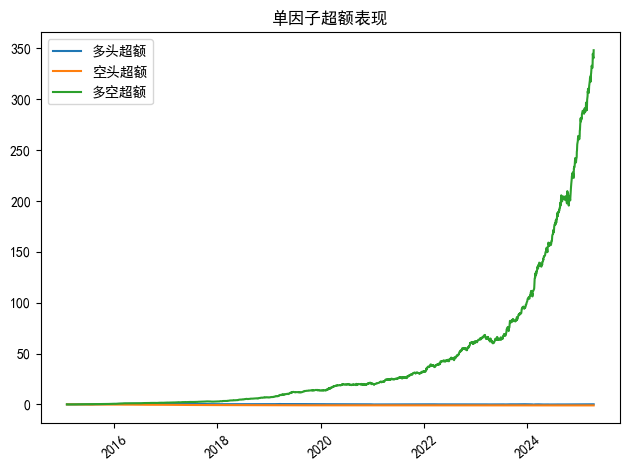

平均单边换手：0.66
年化交易成本:0.193 (未在超额中扣除)


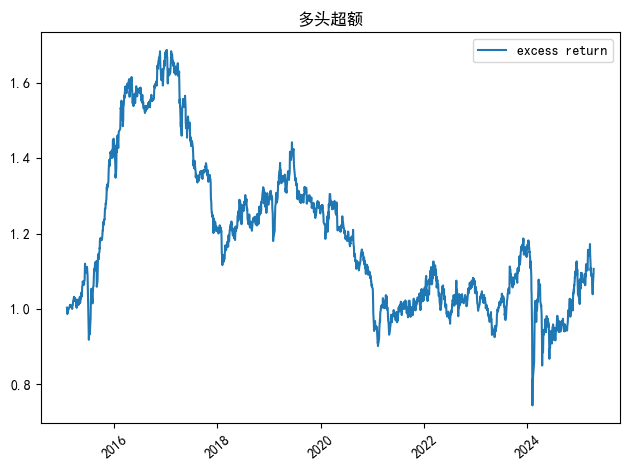

Rank IC: 6.85%
Rank ICIR: 0.51
t值: 12.17
年化收益率: 4.78%
年化波动率: 15.97%
信息比率: 0.30
最大回撤: 44.48%


In [8]:
res_7=config.backtest_stand(composite_factor.loc['2015':],top=300,fre='week',stock_pool='888888')
# Rank IC
rank_ic = res_7['ic']['ic'].mean()
# Rank ICIR
rank_icir = res_7['ic']['ic'].mean() / res_7['ic']['ic'].std()
# t值
t_value = res_7['ic']['ic'].mean() / (res_7['ic']['ic'].std() / np.sqrt(res_7['ic']['ic'].count()))
perf = res_7['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")